In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images')

In [2]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

In [3]:
X['class'] = y

Travail sur la variable désignation, regroupement par class pour trouver les cohérences :

In [4]:
var = X[['designation', 'class']]
var

,designation,class
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,1280
4,La Guerre Des Tuques,2705
...,...,...
84911,The Sims [ Import Anglais ],40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,2583
84913,Journal Officiel De La Republique Francaise N°...,2280
84914,Table Basse Bois De Récupération Massif Base B...,1560


In [5]:
var.designation = var.designation.astype(str)
var.designation = var.designation.str.lower()
var = var.drop_duplicates(subset = "designation")

C:\Users\barry\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
var

,designation,class
0,olivia: personalisiertes notizbuch / 150 seite...,10
1,journal des arts (le) n° 133 du 28/09/2001 - l...,2280
2,grand stylet ergonomique bleu gamepad nintendo...,50
3,peluche donald - europe - disneyland 2000 (mar...,1280
4,la guerre des tuques,2705
...,...,...
84911,the sims [ import anglais ],40
84912,kit piscine acier nevada déco pierre ø 3.50m x...,2583
84913,journal officiel de la republique francaise n°...,2280
84914,table basse bois de récupération massif base b...,1560


Enlever les symboles : 

In [7]:
symbols = [",", "'",  "/", "{", "}", "[", "]","(",")", ":", ";", "°", "-", "_", "ø"]

In [70]:
for i in symbols :
    try :
        var.replace(i, " ", regex = True, inplace = True)
    except: 
        pass
    

var.replace(".", "",  inplace = True)

var #Remarque fonctionne pas pour tous   

C:\Users\barry\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,designation,class
0,olivia personalisiertes notizbuch 150 seite...,10
1,journal des arts (le) n 133 du 28 09 2001 l...,2280
2,grand stylet ergonomique bleu gamepad nintendo...,50
3,peluche donald europe disneyland 2000 (mar...,1280
4,la guerre des tuques,2705
...,...,...
84911,the sims [ import anglais,40
84912,kit piscine acier nevada déco pierre 3.50m x...,2583
84913,journal officiel de la republique francaise n ...,2280
84914,table basse bois de récupération massif base b...,1560


In [133]:
var[var['class'] == 1140].head(10).designation.tolist()

['power rangers rouge force mystic figurine transformable 18 cm',
 'véhicule star wars a ast5',
 'magnet europe paris 44',
 'lampe star wars   lampe neon sabre laser',
 'it   bobble head pop n  539   beverly with key necklace',
 'figurine zhu zhu pets   zhu zhu pet dans son panier   happy meal   mcdo 2012',
 'chopper dragon ball kai x one piece noël edition',
 'dragon ball soul of hyper figuration figurine chichi version colorisé bandai',
 'star wars episode vii salière et poivrière bb 8 & r2 d2',
 'porte clefs   ville d avignon']

In [132]:
var[var['class'] == 1140].tail(15).designation.tolist()

['kingdom hearts avatar mascot strap vol. 4 sera',
 'mezco toys the goon 7¿',
 'starwars d2 r2 fx tatooine',
 'gundam zeonography 3010a galbaldy alpha red gelgoog commander type figure',
 'figurine game of thrones   jaime lannister golden hand pop 10cm',
 'hot toys mms317   star wars   the force awakens   first order stormtrooper',
 'coffret deux voitures marvel de marque corgi',
 'star wars   the empire strikes back   r 3po (hoth evacuation)',
 'adventure time   t shirt finn full front (m)',
 'htb nendoroid mascot kigurumi on chan (pvc & abs figure moving pre painted)',
 'doctor who mug dalek pop',
 'vintage tenue action man   red devil parachutist',
 'figurine wintouc   série pocahontas miniature (nestlé 1996)',
 'figurine "bip   viacom"   dora l exploratrice   lot de 3',
 'buste dark vador disney']

CLASSE 10 :

In [71]:
var10 = var[var['class'] == 40]
var10

,designation,class
31,x men 3 the movie,40
34,the lord or thé rings,40
47,shin masoukishin panzer warfare (import jap),40
50,jeu pc cd rom azteca,40
101,innercity burnout [import allemand [jeu pc,40
...,...,...
84817,men in black alien crisis ensemble complet ...,40
84833,gundam battle online (version japon),40
84841,timesplitters future perfect,40
84865,câble audio jack steréo 3.5 mm rca mâle access...,40


In [72]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\barry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Token : 

In [73]:
token = var10.designation.apply(word_tokenize)
token
#Allemand, anglais, français

31                                 [x, men, 3, the, movie]
34                             [the, lord, or, thé, rings]
47       [shin, masoukishin, panzer, warfare, (, import...
50                              [jeu, pc, cd, rom, azteca]
101      [innercity, burnout, [, import, allemand, [, j...
                               ...                        
84817    [men, in, black, alien, crisis, ensemble, comp...
84833       [gundam, battle, online, (, version, japon, )]
84841                     [timesplitters, future, perfect]
84865    [câble, audio, jack, steréo, 3.5, mm, rca, mâl...
84911                      [the, sims, [, import, anglais]
Name: designation, Length: 2478, dtype: object

# Stop_words :

In [74]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_french = set(stopwords.words("french"))
stop_words_english = set(stopwords.words("english"))
stop_words_german = set(stopwords.words("german"))

stop_words = stop_words_french.union(stop_words_english) 
stop_words = stop_words.union(stop_words_german )
print(stop_words)

{"you'd", 'seraient', 'who', 'keine', 'tes', 'lui', 'bei', 'können', 'été', 'deinen', 'selbst', 'him', 'welches', 'zum', 'eues', 'l', 'such', "wouldn't", 'eu', 'between', 'not', 'mais', 'sur', 'fut', 'off', 'after', 'derselben', 'zwar', 'eussent', 'by', 'dans', 'wouldn', 'pas', 'leur', 'serions', 'from', 'ont', 'jeden', 'wirst', 'nach', 'hat', 'seinen', 'again', 'toi', 'seriez', 'a', 'ses', 'les', 'indem', 'einen', 'dir', 'welcher', 'how', 'à', 'ce', 'where', 'keinem', 'étiez', 'nous', 's', 'son', 'or', 'furent', 'ta', 'allem', 'his', 'damit', 'kein', 'als', 'nur', 'they', 've', 'me', 'étants', 'ihrem', 'vos', 'sondern', 'aber', 'solchen', 'being', 'jenes', "you're", 'themselves', 'meinen', 'deines', 'fussent', 'ayez', 'denselben', 'einigen', 'are', 'dass', 'au', 'tu', 'sie', 'during', 'eue', 'ich', 'un', 'ait', 'them', 'eurent', 'its', 'was', 'the', 'aus', 'te', 'what', 'anderem', 'aurait', 'seine', 'da', 'don', 'daß', 'mes', 'einem', 'anderr', 'desselben', 'then', "should've", 'waren

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fonction stop_words_filtering :

In [75]:
def stop_words_filetring(mots) : 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

In [76]:
#Application & check
token = token.apply(stop_words_filetring)


#Enlever les ponctuations

# Suppression ponctuation : 

In [77]:
import string
list_ponctuation = []
for i in string.punctuation :
    list_ponctuation.append(i)
list_ponctuation    

def stop_ponctuations(mots) : 
    tokens = []
    for mot in mots:
        if mot not in list_ponctuation:
            tokens.append(mot)
    return tokens

In [78]:
token = token.apply(stop_ponctuations)
token

31                                      [x, men, 3, movie]
34                                      [lord, thé, rings]
47       [shin, masoukishin, panzer, warfare, import, jap]
50                              [jeu, pc, cd, rom, azteca]
101        [innercity, burnout, import, allemand, jeu, pc]
                               ...                        
84817    [men, black, alien, crisis, ensemble, complet,...
84833             [gundam, battle, online, version, japon]
84841                     [timesplitters, future, perfect]
84865    [câble, audio, jack, steréo, 3.5, mm, rca, mâl...
84911                              [sims, import, anglais]
Name: designation, Length: 2478, dtype: object

# Stop accent : 

In [79]:
import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [80]:
liste_i = []
liste_a= []

for i in token :
    liste_j = []
    for j in i :
        liste_j.append(strip_accents(j))
    liste_a.append(liste_j)
    
token=pd.Series(liste_a, index = token.index)

In [81]:
print(token.to_string())

31                                      [x, men, 3, movie]
34                                      [lord, the, rings]
47       [shin, masoukishin, panzer, warfare, import, jap]
50                              [jeu, pc, cd, rom, azteca]
101        [innercity, burnout, import, allemand, jeu, pc]
107      [zumba, fitness, rush, jeu, kinect, import, al...
142             [pokemon, saphir, alpha, edition, limitee]
195                      [king, bounty, armored, princess]
204      [cable, adaptateur, audio, stereo, ordinateurs...
252                      [guilty, gear, x, version, japon]
282                         [world, destruction, lea, jet]
332      [magideal, reparation, module, capteur, analog...
346      [assassin, creed, brotherhood, assassin, creed...
421               [planet, 51, import, allemand, jeu, wii]
422      [magideal, coque, console, jeux, video, alumin...
476                                          [would, soul]
483      [mission, veterinaire, soigne, animaux, famili.

In [82]:
tokene = pd.DataFrame(token, columns = ['designation'])
from nltk.tokenize.regexp import RegexpTokenizer

tokenizer = RegexpTokenizer(pattern = "\w{4,}")

tokene.designation = tokene.designation.astype(str)
tokene.designation = tokene.designation.apply(tokenizer.tokenize)
tokene

,designation
31,[movie]
34,"[lord, rings]"
47,"[shin, masoukishin, panzer, warfare, import]"
50,[azteca]
101,"[innercity, burnout, import, allemand]"
...,...
84817,"[black, alien, crisis, ensemble, complet, play..."
84833,"[gundam, battle, online, version, japon]"
84841,"[timesplitters, future, perfect]"
84865,"[cable, audio, jack, stereo, male, accessoires..."


# STEMMER : 

In [83]:
#Version française
from nltk.stem.snowball import FrenchStemmer
liste_a= []
stemmer = FrenchStemmer()

ess = pd.Series(tokene.designation)
for i in ess :
    liste_j =[]
    for j in i:
        liste_j.append(stemmer.stem(word = j))
    liste_a.append(liste_j)
tokene = pd.Series(liste_a, index = token.index)

In [84]:
#Version anglaise
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()


liste_a= []

for i in tokene :
    liste_j =[]
    for j in i:
        liste_j.append(porter.stem(word = j))
    liste_a.append(liste_j)
tokene = pd.Series(liste_a, index = token.index)

liste_a= []

for i in tokene :
    liste_j =[]
    for j in i:
        liste_j.append(lancaster.stem(word = j))
    liste_a.append(liste_j)
tokene = pd.Series(liste_a, index = token.index)


tokene

31                                                   [mov]
34                                            [lord, ring]
47                 [shin, masoukishin, panz, warf, import]
50                                                 [aztec]
101                    [innerc, burnout, import, allemand]
                               ...                        
84817          [black, aly, cri, ensembl, complet, playst]
84833                  [gundam, battl, onlin, vert, japon]
84841                            [timesplit, fut, perfect]
84865    [cabl, audio, jack, stereo, mal, accessoir, sp...
84911                                 [sim, import, angla]
Length: 2478, dtype: object

# LEMMATIZATION :

import spacy

for token in doc:
    print(token, token.lemma_)

In [85]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

liste_a= []

for i in tokene :
    liste_j =[]
    for j in i:
        liste_j.append(wnl.lemmatize(word = j, pos = "n"))
    liste_a.append(liste_j)
tokene = pd.Series(liste_a, index = token.index)
tokene

31                                                   [mov]
34                                            [lord, ring]
47                 [shin, masoukishin, panz, warf, import]
50                                                 [aztec]
101                    [innerc, burnout, import, allemand]
                               ...                        
84817          [black, aly, cri, ensembl, complet, playst]
84833                  [gundam, battl, onlin, vert, japon]
84841                            [timesplit, fut, perfect]
84865    [cabl, audio, jack, stereo, mal, accessoir, sp...
84911                                 [sim, import, angla]
Length: 2478, dtype: object

In [86]:
tokene = pd.DataFrame(tokene, columns = ["designation"])

Vectorization :

In [87]:
tokene.designation=[" ".join(text) for text in tokene.designation.values]
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(tokene.designation)
vectorizer.vocabulary_

{'mov': 2045,
 'lord': 1823,
 'ring': 2553,
 'shin': 2713,
 'masoukishin': 1903,
 'panz': 2219,
 'warf': 3261,
 'import': 1517,
 'aztec': 301,
 'innerc': 1535,
 'burnout': 480,
 'allemand': 173,
 'zumb': 3402,
 'fit': 1183,
 'rush': 2596,
 'kinect': 1689,
 'xbox': 3322,
 'pokemon': 2337,
 'saph': 2624,
 'alph': 178,
 'edit': 988,
 'limit': 1797,
 'king': 1690,
 'bount': 438,
 'arm': 249,
 'princess': 2378,
 'cabl': 492,
 'adapt': 135,
 'audio': 281,
 'stereo': 2889,
 'ordin': 2179,
 'port': 2345,
 'mal': 1870,
 'magid': 1852,
 'guilt': 1373,
 'gear': 1288,
 'vert': 3209,
 'japon': 1584,
 'world': 3311,
 'destruct': 865,
 'rep': 2510,
 'mod': 1999,
 'capt': 517,
 'analog': 198,
 'joystick': 1621,
 'consol': 700,
 'microsoft': 1969,
 'assassin': 261,
 'cree': 750,
 'broth': 459,
 'revel': 2539,
 'angla': 205,
 'planet': 2303,
 'coqu': 715,
 'jeux': 1597,
 'video': 3218,
 'alumin': 180,
 'boit': 414,
 'son': 2816,
 'would': 3314,
 'soul': 2826,
 'miss': 1991,
 'veterinair': 3212,
 'soign'

In [88]:
from collections import Counter
print(Counter(vectorizer.vocabulary_))

Counter({'zuruck': 3403, 'zumb': 3402, 'zorro': 3401, 'zool': 3400, 'zon': 3399, 'zombrex': 3398, 'zomb': 3397, 'zodiac': 3396, 'zip': 3395, 'zhongru': 3394, 'zero': 3393, 'zenin': 3392, 'zenig': 3391, 'zeld': 3390, 'zap': 3389, 'zank': 3388, 'zam': 3387, 'zak': 3386, 'zaidanhoujin': 3385, 'yxjjpj809': 3384, 'yxjjpj773': 3383, 'yxjjpj769': 3382, 'yxjjpj761': 3381, 'yxjjpj748': 3380, 'yxjjpj684': 3379, 'yxjjpj681': 3378, 'yxjjpj673': 3377, 'yxjjpj653': 3376, 'yxjjpj629': 3375, 'yxjjpj613': 3374, 'yxjjpj596': 3373, 'yxjjpj595': 3372, 'yxjjpj592': 3371, 'yxjjpj576': 3370, 'yxjjpj547': 3369, 'yxjjpj423': 3368, 'yxjjpj392': 3367, 'yxjjpj389': 3366, 'yxjjpj376': 3365, 'yxjjpj347': 3364, 'yxjjpj329': 3363, 'yxjjpj311': 3362, 'yxjjpj300': 3361, 'yxjjpj219': 3360, 'yxjjpj217': 3359, 'yxjjpj204': 3358, 'yxjjpj170': 3357, 'yxjjpj163': 3356, 'yxjjpj154': 3355, 'yxjjpj149': 3354, 'yxjjpj146': 3353, 'yxjjpj141': 3352, 'yxjjpj121': 3351, 'yxjjpj079': 3350, 'yxjjpj073': 3349, 'yxjjpj031': 3348, 'yuush

Histogramme : 

<BarContainer object of 15 artists>

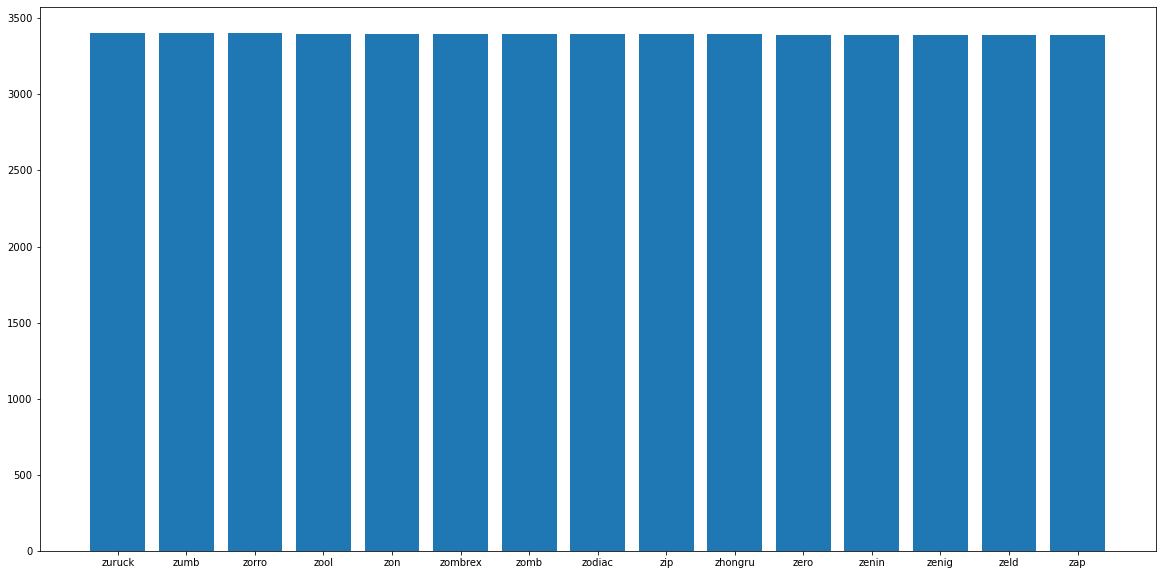

In [89]:
# Insérer votre code ici 
from collections import Counter
freq = Counter(vectorizer.vocabulary_)
plt.figure(figsize = (20,10))
plt.bar(x = pd.DataFrame(freq.most_common(15), columns = ['word', "Count"]).word.tolist(), height = pd.DataFrame(freq.most_common(15), columns = ['word', "Count"]).Count.tolist())


WordCloud : 

In [90]:
from wordcloud import WordCloud
wc = WordCloud(background_color = "black", max_words = 400,  height = 100, stopwords = stop_words)

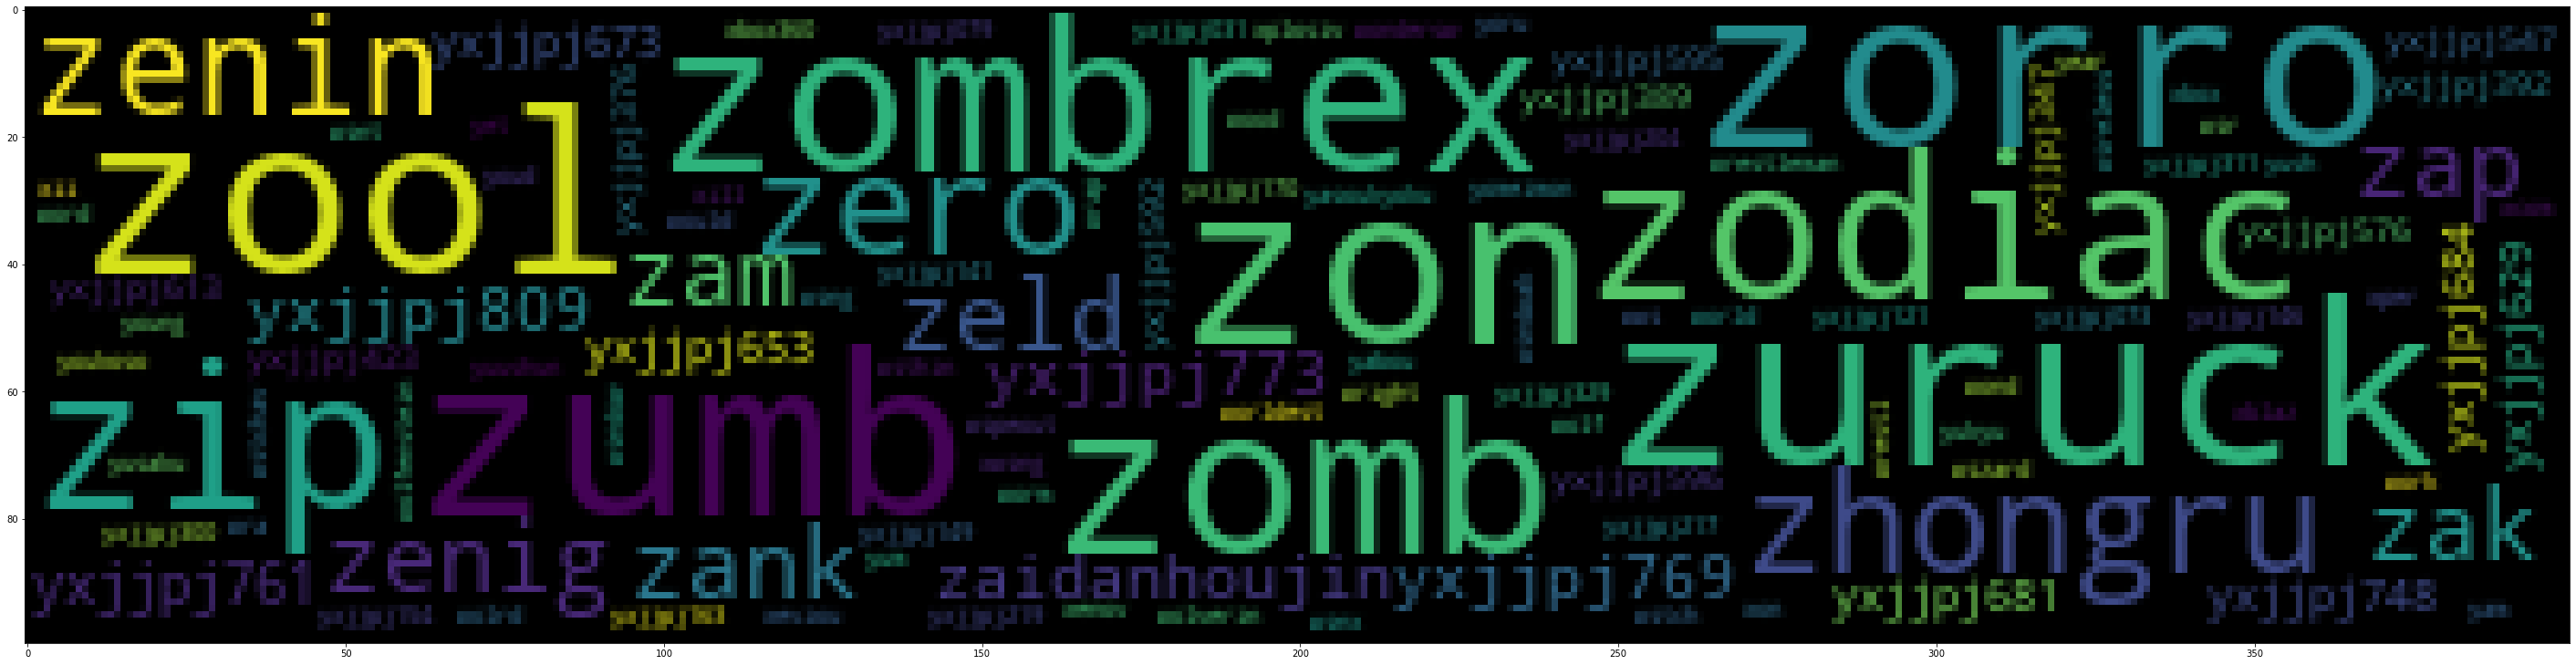

In [91]:
import matplotlib.pyplot as plt 

# Générer et afficher le nuage de mots

plt.figure(figsize= (50,50)) # Initialisation d'une figure
wc.generate_from_frequencies(vectorizer.vocabulary_)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()